author: Diogo Silva

In [1]:
%pylab inline
#%qtconsole

Populating the interactive namespace from numpy and matplotlib


In [49]:
home = %env HOME

In [50]:
cd $home/QCThesis/EAC

/home/diogoaos/QCThesis/EAC


# Generate data & data partitions

In [4]:
%run generatePartitions.py -d synthetic -n 100 -D 2 -C 6 -i 3 -m cuda -s syn_cem -np 20 -mc 4 -Mc 25 -dir test/

2015-04-22 09:26:30,627 - status - INFO - Start of logging.
2015-04-22 09:26:30,627 - status - INFO - Start of logging.
INFO:status:Start of logging.
2015-04-22 09:26:30,630 - status - INFO - Generating data:nsamples=100,ndims=2,centers=6
2015-04-22 09:26:30,630 - status - INFO - Generating data:nsamples=100,ndims=2,centers=6
INFO:status:Generating data:nsamples=100,ndims=2,centers=6
2015-04-22 09:26:30,637 - status - INFO - Generating partition: #0, clusters=[11]
2015-04-22 09:26:30,637 - status - INFO - Generating partition: #0, clusters=[11]
INFO:status:Generating partition: #0, clusters=[11]
2015-04-22 09:26:30,654 - status - INFO - Saved partition: test/syn_cem_partition_0.csv
2015-04-22 09:26:30,654 - status - INFO - Saved partition: test/syn_cem_partition_0.csv
INFO:status:Saved partition: test/syn_cem_partition_0.csv
2015-04-22 09:26:30,658 - status - INFO - Generating partition: #1, clusters=[13]
2015-04-22 09:26:30,658 - status - INFO - Generating partition: #1, clusters=[13]

# Get test partitions

In [55]:
ls test

syn_cem.log                syn_data_partition_1.csv   syn_data_partition_34.csv
syn_cem_data.csv           syn_data_partition_10.csv  syn_data_partition_35.csv
syn_cem_ground_truth.csv   syn_data_partition_11.csv  syn_data_partition_36.csv
syn_cem_partition_0.csv    syn_data_partition_12.csv  syn_data_partition_37.csv
syn_cem_partition_1.csv    syn_data_partition_13.csv  syn_data_partition_38.csv
syn_cem_partition_10.csv   syn_data_partition_14.csv  syn_data_partition_39.csv
syn_cem_partition_11.csv   syn_data_partition_15.csv  syn_data_partition_4.csv
syn_cem_partition_12.csv   syn_data_partition_16.csv  syn_data_partition_40.csv
syn_cem_partition_13.csv   syn_data_partition_17.csv  syn_data_partition_41.csv
syn_cem_partition_14.csv   syn_data_partition_18.csv  syn_data_partition_42.csv
syn_cem_partition_15.csv   syn_data_partition_19.csv  syn_data_partition_43.csv
syn_cem_partition_16.csv   syn_data_partition_2.csv   syn_data_partition_44.csv
syn_cem_partition_17.csv   syn_data_parti

In [88]:
files=!ls $home/QCThesis/EAC/test
folder= home + "/QCThesis/EAC/test/"
for i,f in enumerate(files):
    files[i] = folder+f

partition_files = [f for f in files if "_partition_" in f and "syn_cem" in f]

In [89]:
partition_files

['/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_0.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_1.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_10.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_11.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_12.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_13.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_14.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_15.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_16.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_17.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_18.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_19.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_2.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_3.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_4.csv',
 '/home/diogoaos/QCThesis/EAC/test/syn_cem_partition_5.csv',
 '/home/diogoa

# Cluster

In [60]:
pwd

u'/home/diogoaos/QCThesis/EAC'

In [83]:
import eac

In [84]:
reload(eac)

<module 'eac' from 'eac.pyc'>

In [90]:
#%debug
reload(eac)
estimator=eac.EAC(100)
estimator.fit(partition_files,files=True,assoc_mode='full', prot_mode='random', nprot=None)

In [91]:
np.where(estimator._coassoc==20)[0].size

140

In [92]:
print estimator._coassoc.shape
print estimator._coassoc
print "Diagonal"
print estimator._coassoc.diagonal()
print "Symmetric:\t",(estimator._coassoc.T == estimator._coassoc).all()

(100, 100)
[[ 20.  14.  14. ...,  10.  11.   7.]
 [ 14.  20.  15. ...,  10.  12.   7.]
 [ 14.  15.  20. ...,  11.  14.   9.]
 ..., 
 [ 10.  10.  11. ...,  20.   8.   5.]
 [ 11.  12.  14. ...,   8.  20.  15.]
 [  7.   7.   9. ...,   5.  15.  20.]]
Diagonal
[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]
Symmetric:	True


# Linkage

In [20]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

def _apply_linkage(assoc_mat,method='single'):
    """
    SciPy linkage wants a distance array of format pdist. SciPy squareform 
    converts between the two formats.

    assoc_mat 	: pair-wise similarity association matrix
    method 		: linkage method to use; can be 'single'(default), 'complete',
                  'average', 'weighted', 'centroid', 'median', 'ward'
    """

    condensed_assoc = squareform(assoc_mat)

    # convert pair-wise similarity array (assoc_mat->condensed_assoc) to dissimilarity
    condensed_diss_assoc = condensed_assoc.max() - condensed_assoc

    Z = linkage(condensed_diss_assoc,method=method)

    return Z

In [56]:
assoc=estimator._coassoc
coassoc = assoc / 20
coassoc = coassoc.max() - coassoc

In [57]:
coassoc

array([[ 0.  ,  0.3 ,  0.3 , ...,  0.5 ,  0.45,  0.65],
       [ 0.3 ,  0.  ,  0.25, ...,  0.5 ,  0.4 ,  0.65],
       [ 0.3 ,  0.25,  0.  , ...,  0.45,  0.3 ,  0.55],
       ..., 
       [ 0.5 ,  0.5 ,  0.45, ...,  0.  ,  0.6 ,  0.75],
       [ 0.45,  0.4 ,  0.3 , ...,  0.6 ,  0.  ,  0.25],
       [ 0.65,  0.65,  0.55, ...,  0.75,  0.25,  0.  ]])

In [58]:
Z=_apply_linkage(coassoc)

In [48]:
import scipy.cluster.hierarchy as hie

In [64]:
for l in Z:
    print l
    
X = [c for c in Z if c[0] >=100 and c[1] >= 100]
print "argmax\t",np.argmax(Z[:,2])
print Z[np.argmax(Z[:,2])]

[  0.  98.   0.   2.]
[  34.  100.    0.    3.]
[  38.  101.    0.    4.]
[  41.  102.    0.    5.]
[  42.  103.    0.    6.]
[  45.  104.    0.    7.]
[  91.  105.    0.    8.]
[  47.  106.    0.    9.]
[  51.  107.    0.   10.]
[  53.  108.    0.   11.]
[  55.  109.    0.   12.]
[  56.  110.    0.   13.]
[  61.  111.    0.   14.]
[  63.  112.    0.   15.]
[  64.  113.    0.   16.]
[  66.  114.    0.   17.]
[  67.  115.    0.   18.]
[  70.  116.    0.   19.]
[  71.  117.    0.   20.]
[  75.  118.    0.   21.]
[  78.  119.    0.   22.]
[  79.  120.    0.   23.]
[  81.  121.    0.   24.]
[  82.  122.    0.   25.]
[  84.  123.    0.   26.]
[  85.  124.    0.   27.]
[  88.  125.    0.   28.]
[  89.  126.    0.   29.]
[  33.  127.    0.   30.]
[  32.  128.    0.   31.]
[  46.  129.    0.   32.]
[  16.  130.    0.   33.]
[   1.  131.    0.   34.]
[   2.  132.    0.   35.]
[   6.  133.    0.   36.]
[   9.  134.    0.   37.]
[  14.  135.    0.   38.]
[  18.  136.    0.   39.]
[  20.  137.    

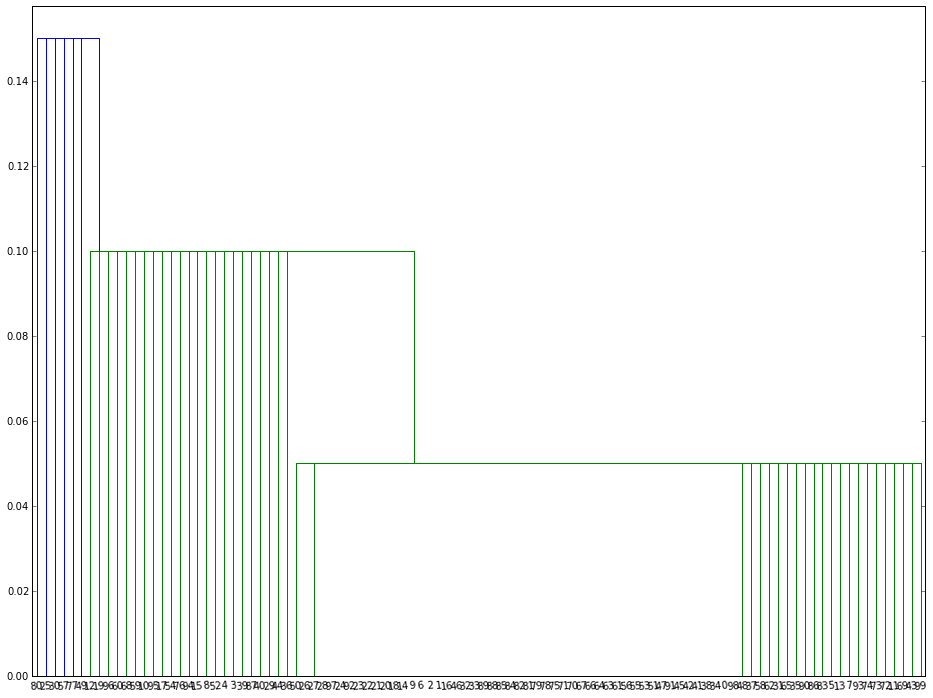

In [125]:
plt.figure(figsize=(16,12))
r=hie.dendrogram(Z,leaf_rotation=90,show_contracted=True)

In [131]:
len(r['color_list'])

99

In [123]:
dif=Z[1:,2]-Z[0:-1,2]
#[maximo,indice]=max(dif);

In [124]:
print "max lifetime: ", dif.max()
print "index: ", dif.argmax()

max lifetime:  0.05
index:  47


# K random prototypes

In [100]:
#%debug
reload(eac)
estimator=eac.EAC(100)
estimator.fit(partition_files,files=True,assoc_mode='prot', prot_mode='random', nprot=5)

In [101]:
estimator._coassoc.sum()

4274.0

# K Centroid-based prototypes

In [21]:
#%%debug -b eac.py:190
reload(eac)
estimator=eac.EAC(100,data=data)
estimator.fit(partition_files,files=True,assoc_mode='prot', prot_mode='other', nprot=5)

AttributeError: 'module' object has no attribute 'shape'

In [112]:
b=np.zeros(a.shape[0])
for c in xrange(a.shape[0]):
    dist = data - a[c]
    dist = dist **2
    dist = dist.sum(axis=1)
    b[c] = np.argmin(dist)
b

array([ 62.,   5.,  32.])

In [108]:
a=array([[-778.1035957 ,  728.38305131],
       [ 474.98214377,  654.43652209],
       [ -62.22709694,  637.21319263]])

In [115]:
estimator.k_labels

array([32,  0], dtype=int32)

In [88]:
estimator._coassoc.sum()

3730.0

# K-Nearest Neighbours
This is how it is implemented inside the EAC class.

## Load data

In [7]:
datafile=None
for f in files:
    if 'syn_cem' in f and 'data' in f:
        datafile=f
        
print datafile

/home/chiroptera/workspace/QCThesis/EAC/test/syn_cem_data.csv


In [8]:
data = np.genfromtxt(datafile,delimiter=',')

## Selecting the neighbours

In [251]:
from sklearn.neighbors import NearestNeighbors

In [252]:
K_neigh=6
# Minkowski distance is a generalization of Euclidean distance and is equivelent to it for p=2
neigh = NearestNeighbors(n_neighbors=K_neigh, radius=1.0, algorithm='auto', leaf_size=30, metric='minkowski', p=2)
neigh.fit(data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_neighbors=6, p=2, radius=1.0)

In [253]:
data_neighbours=neigh.kneighbors(X=data,return_distance=False)

# the closest neighbour is the point itself - no interest in that
data_neighbours = data_neighbours[:,1:]

In [254]:
data_neighbours

array([[58, 98, 19, 16,  9],
       [61, 31, 35, 11,  6],
       [68, 65, 50, 28, 81],
       [ 4, 77,  8,  7,  5],
       [ 7,  5,  8,  3, 53],
       [ 7, 53,  4,  8, 30],
       [35, 11, 61, 80, 97],
       [ 5, 53,  4,  8, 63],
       [14,  4,  7,  5, 90],
       [41, 71, 72, 16, 95],
       [91, 36, 42, 39, 22],
       [80,  6, 61,  1, 35],
       [49, 31, 29, 64,  1],
       [73, 66, 59, 81, 24],
       [90, 54, 60,  8, 85],
       [47, 66, 33, 13, 83],
       [92,  9, 72, 41, 71],
       [23, 55, 78, 94, 38],
       [57, 93, 52, 26, 78],
       [74, 58,  0, 98, 44],
       [80, 11,  6,  1, 97],
       [69, 27, 86, 25, 46],
       [39, 96, 87, 75, 79],
       [17, 94, 38, 78, 51],
       [99, 83, 33, 66, 84],
       [86, 75, 87, 79, 69],
       [52, 57, 18, 93, 78],
       [46, 21, 86, 69, 25],
       [50, 68, 65, 81, 59],
       [82, 35, 61, 31, 49],
       [85, 53,  5,  7, 60],
       [ 1, 61, 49, 35,  6],
       [40, 44, 95, 71, 41],
       [83, 24, 99, 66, 84],
       [88, 89

## EAC

In [11]:
#%debug
reload(eac)
estimator=eac.EAC(100,data=data)
estimator.fit(partition_files,files=True,assoc_mode='prot', prot_mode='knn', nprot=5)

In [12]:
estimator._coassoc.sum()

3601.0

# sparse matrix linkage

In [197]:
diss_mat = estimator._coassoc
diss_labels = estimator.k_neighbours

In [13]:
from scipy.sparse import *

In [214]:
smat = csr_matrix((100,100))
mat = np.zeros((100,100))

In [212]:
%timeit smat[0,0]=50
%timeit mat[0,0]=50

The slowest run took 6.74 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 179 µs per loop
The slowest run took 16.41 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 174 ns per loop


In [208]:
rows=diss_labels[0]
cols=diss_labels[1]

In [216]:
rows

array([58, 98, 19, 16,  9])

In [223]:
%timeit mat[rows[:,np.newaxis],cols]=1
%timeit smat[rows[:,np.newaxis],cols]=1

The slowest run took 66.20 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.8 µs per loop
1000 loops, best of 3: 237 µs per loop


In [227]:
smat*2

<100x100 sparse matrix of type '<type 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

## Testing updating sparse coassoc

In [142]:
def _update_coassoc_knn(assoc_mat,clusters,k_neighbours):
    """
    Updates an NxK co-association matrix.
    k_neighbours is an NxK array where the k-th element of the i-th row is the index of a data point 
    that corresponds to the k-th nearest neighbour of the i-th data point. That neighbour is the k-th
    prototype of the i-th data point.
    """
    nclusters = len(clusters)
    for i in xrange(nclusters):

        if clusters[i].shape > 1:

            # all data points in cluster - rows to select
            n_in_cluster = clusters[i]

            # update row j of matrix
            for j in n_in_cluster:
                # all prototypes in cluster - columns to select
                k_in_cluster = np.where(np.in1d(k_neighbours[j]	,n_in_cluster))

                # this indexing selects the rows and columns specified by n_in_cluster and k_in_cluster
                assoc_mat[j,k_in_cluster] += 1 # np.newaxis is alias for None
        pass

def _update_coassoc_knn_sparse(assoc_mat,clusters,k_neighbours):
    """
    Updates an NxK co-association matrix.
    k_neighbours is an NxK array where the k-th element of the i-th row is the index of a data point 
    that corresponds to the k-th nearest neighbour of the i-th data point. That neighbour is the k-th
    prototype of the i-th data point.
    """
    nclusters = len(clusters)
    for i in xrange(nclusters):

        if clusters[i].shape > 1:

            # all data points in cluster - rows to select
            n_in_cluster = clusters[i]

            # update row j of matrix
            for j in n_in_cluster:
                # all prototypes in cluster - columns to select
                # column indices corresponding to the K-prototypes
                #k_in_cluster = np.where(np.in1d(n_in_cluster,k_neighbours[j]))[0]
                
                k_in_cluster = n_in_cluster[np.in1d(n_in_cluster,k_neighbours[j])]
                
                # this indexing selects the rows and columns specified by n_in_cluster and k_in_cluster
                #assoc_mat[j,k_in_cluster] += 1 # np.newaxis is alias for None
                assoc_mat[j,k_in_cluster] += np.ones_like(k_in_cluster)
        pass


In [10]:
def mat_match(sparse,normal,neigh):

    for row in xrange(sparse.shape[0]):
        cols_in_sparse = neigh[row][normal[row].astype(bool)]
        row_in_sparse = sparse[row,cols_in_sparse]
        row_in_normal = normal[row][normal[row].astype(bool)]
        if (row_in_sparse != row_in_normal).any():
            return False
    return True

In [111]:
def zero_low_tri(sparse):
    r,c = sparse.shape
    for i in xrange(r):
        for j in xrange(c):
            if j >= c:
                continue
            if sparse[i,j] != 0:
                return False
    return True

In [202]:
def func1(smat):
    """
    check that, where the matrix is not symetric, at least one of the values is 0
    """
    a=smat.todense()
    row,col = np.where(a!=a.T)
    row=np.array(row).flatten()
    col=np.array(col).flatten()
    for i in xrange(row.size):
        if a[row[i],col[i]] != 0 and a[col[i],row[i]] != 0:
            return False
    return True

In [227]:
def func2(smat):
    """
    true if lower triangle is zero where matrix is not symetric
    """
    a=smat.todense()
    row,col = np.where(a!=a.T)
    row=np.array(row).flatten()
    col=np.array(col).flatten()
    for i in xrange(row.size):
        if row[i] > col[i] and a[row[i],col[i]] != 0:
            return False
    return True

In [226]:
def func3(smat):
    """
    true if upper triangle is zero where matrix is not symetric
    """
    a=smat.todense()
    row,col = np.where(a!=a.T)
    row=np.array(row).flatten()
    col=np.array(col).flatten()
    for i in xrange(row.size):
        if row[i] < col[i] and a[row[i],col[i]] != 0:
            return False
    return True

In [251]:
def func3(smat):
    """
    make dists only on upper triangle
    """
    a=smat.todense()
    rows,cols = smat.nonzero()
    for i in xrange(rows.size):
        if rows[i]>cols[i] and smat[rows[i],cols[i]] != 0:
            smat[cols[i],rows[i]] = smat[rows[i],cols[i]]
        smat[rows[i],cols[i]] = 0      
        
    pass

In [259]:
def func4(smat):
    """
    make dists symmetric
    """
    a=smat.todense()
    rows,cols = smat.nonzero()
    for i in xrange(rows.size):
        if rows[i]<cols[i] and smat[rows[i],cols[i]] != 0:
            smat[cols[i],rows[i]] = smat[rows[i],cols[i]]    
        
    pass

In [157]:
clusters_a = estimator._readPartition(partition_files[0])
neigh_labels = estimator.k_neighbours
#sparse_coassoc = csc_matrix((100,100))
#sparse_coassoc = csr_matrix((100,100))
sparse_coassoc = lil_matrix((100,100))
#sparse_coassoc = coo_matrix((100,100)) # doesn't support slicing
coassoc = np.zeros((100,neigh_labels.shape[1]))

In [158]:
for f in partition_files:
    clusters_a = estimator._readPartition(f)
    _update_coassoc_knn(coassoc,clusters_a,neigh_labels)
    _update_coassoc_knn_sparse(sparse_coassoc,clusters_a,neigh_labels)
mat_match(sparse_coassoc,coassoc,neigh_labels)

True

In [29]:
%timeit _update_coassoc_knn(coassoc,clusters_a,neigh_labels)
%timeit _update_coassoc_knn_sparse(sparse_coassoc,clusters_a,neigh_labels)

100 loops, best of 3: 10.5 ms per loop
10 loops, best of 3: 86.8 ms per loop


In [30]:
print "csr/np = {}".format(134/10.4)
print "csc/np = {}".format(131/10.4)
print "lil/np = {}".format(86.8/10.4)

csr/np = 12.8846153846
csc/np = 12.5961538462
lil/np = 8.34615384615


In [31]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

def _apply_linkage(assoc_mat,method='single'):
    """
    SciPy linkage wants a distance array of format pdist. SciPy squareform 
    converts between the two formats.

    assoc_mat 	: pair-wise similarity association matrix
    method 		: linkage method to use; can be 'single'(default), 'complete',
                  'average', 'weighted', 'centroid', 'median', 'ward'
    """

    condensed_assoc = squareform(assoc_mat)

    # convert pair-wise similarity array (assoc_mat->condensed_assoc) to dissimilarity
    condensed_diss_assoc = condensed_assoc.max() - condensed_assoc

    Z = linkage(condensed_diss_assoc,method=method)

    return Z

In [87]:
Y = sparse_coassoc.tocsr()
Y[i,j]=Y.max()-Y[i,j]

<100x100 sparse matrix of type '<type 'numpy.float64'>'
	with 167 stored elements in Compressed Sparse Row format>

# Linkage experiment

I want to evaluate if complete link is equivalent to single link when the dissimilarity measure is inverted.

In [115]:
import scipy

In [119]:
points=np.array([[5,5],[5,6],[1,1],[1,2],[-2,-2]])
dist=scipy.spatial.distance.pdist(points)
invDist=dist.max()-dist

In [125]:
Z_d=linkage(dist,method="single")
Z_id=linkage(invDist,method="complete")

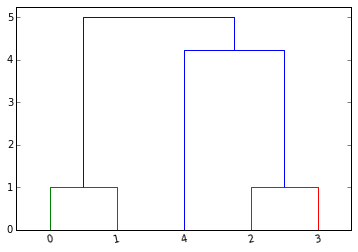

In [126]:
p=scipy.cluster.hierarchy.dendrogram(Z_d)

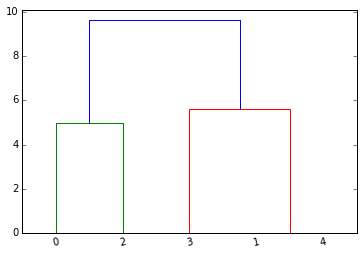

In [127]:
p=scipy.cluster.hierarchy.dendrogram(Z_id)

They're **not equivelent** since the distance between clusters is always **minimized** indepedentely of how the **metric** chosen.

In [138]:
a=np.ones(5)

In [140]:
a[:,np.newaxis]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])